In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
pd.options.display.max_columns=100

In [3]:
df=pd.read_csv('marketing_campaign.csv',sep='	')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
for column in df.columns:
    if df[column].isna().sum()>0:
        print(column, df[column].isna().sum())

Income 24


In [6]:
df['Income']=df['Income'].fillna(df['Income'].median())

In [7]:
df=df.drop('ID',axis=1)

In [8]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
df['Year']=df['Dt_Customer'].dt.year
df['Month']=df['Dt_Customer'].dt.month

df=df.drop('Dt_Customer',axis=1)

In [9]:
for column in df.select_dtypes('object').columns:
    dummies=pd.get_dummies(df[column],prefix=column,dummy_na=False)
    df=df.drop(column,axis=1)
    df=pd.concat([df,dummies],axis=1)
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,4,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,8,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,10,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [20]:
df.corr()['Response'].sort_values(ascending=False)

Response                   1.000000
AcceptedCmp5               0.326634
AcceptedCmp1               0.293982
AcceptedCmp3               0.254258
MntWines                   0.247254
MntMeatProducts            0.236335
NumCatalogPurchases        0.220810
AcceptedCmp4               0.177019
AcceptedCmp2               0.169293
NumWebPurchases            0.148730
MntGoldProds               0.139850
Income                     0.132867
MntFruits                  0.125289
MntSweetProducts           0.117372
MntFishProducts            0.111331
Marital_Status_Single      0.105161
Education_PhD              0.086764
Marital_Status_Divorced    0.055147
Marital_Status_Widow       0.051723
NumStorePurchases          0.039363
Marital_Status_YOLO        0.029449
Marital_Status_Absurd      0.029449
Month                      0.021873
Year_Birth                 0.021325
Marital_Status_Alone       0.018941
Education_Master           0.006178
NumDealsPurchases          0.002238
Complain                  -0

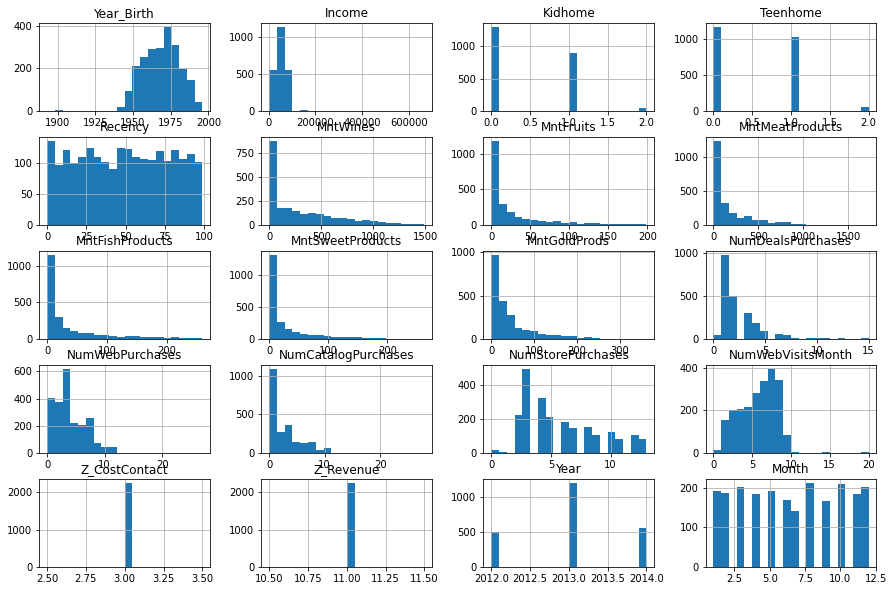

In [27]:
non_bool_cols=[column if df[column].nunique()!=2 else None for column in df.columns]
non_bool_df=df.loc[:,df.columns.isin(non_bool_cols)]

non_bool_df.hist(figsize=(15,10),bins=20)
plt.show()

In [10]:
X=df.drop('Response',axis=1)
Y=df['Response']

In [11]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [12]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#ss=MinMaxScaler(feature_range=(0,1))
ss=StandardScaler()

xtrain_matrix=ss.fit_transform(xtrain)
xtrain=pd.DataFrame(xtrain_matrix,columns=xtrain.columns)

xtest_matrix=ss.transform(xtest)
xtest=pd.DataFrame(xtest_matrix,columns=xtest.columns)

In [13]:
from xgboost import XGBClassifier
model_xgbc=XGBClassifier(n_estimators=1000)

In [14]:
model_xgbc.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [15]:
predictions=model_xgbc.predict(xtest)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
test_accuracy=accuracy_score(predictions,ytest)

In [18]:
print(f'Accuracy Score is {test_accuracy}')

Accuracy Score is 0.890625


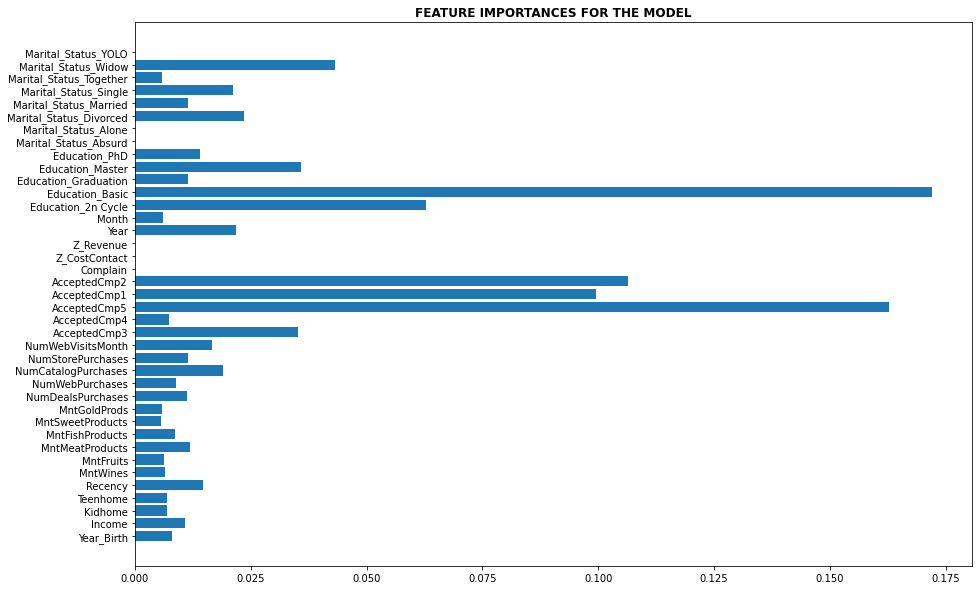

In [19]:
plt.figure(figsize=(15,10))
plt.barh(model_xgbc.feature_names_in_,model_xgbc.feature_importances_)
plt.title('FEATURE IMPORTANCES FOR THE MODEL',fontweight='bold')
plt.show()